In [72]:
from utils import *

# Explorative analysis - Respondents

In [73]:
respondents, _, _, _ = loadData()

In [74]:
respondents.head()

,respondent,variant,time,categories,age,gender,education,income,domain,crt,...,cardQuantity,bfExtra,bfAgree,bfConsc,bfNegEmo,bfOpenMind,att1,att2,note,informativeness
0,5,E50,403,2,18 - 24,Woman,Technical/community college,"£20,000 - £29,999",At least once a month,0,...,2,12,13,12,8,12,Salad,30,no,42.253529
1,6,E50,1129,11,18 - 24,Woman,High school diploma,"£0 - £9,999",At least once a week,1,...,2,5,9,6,14,11,Salad,30,very good study to understand and questions we...,37.982634
2,7,E50,424,4,18 - 24,Man,Undergraduate degree,No income,At least once a week,3,...,2,10,12,12,4,11,Salad,30,Did not answer,31.773894
3,8,E50,650,9,18 - 24,Man,Undergraduate degree,"More than £100,000",Less often,3,...,4,11,14,14,4,14,Salad,30,Did not answer,20.762000
4,10,E50,773,7,18 - 24,Man,High school diploma,No income,Less often,1,...,3,5,12,8,9,10,Salad,30,Did not answer,25.797000


## Study variants

In [75]:
respondents.groupby('variant').size()

variant
B30    40
B50    40
E30    40
E50    40
dtype: int64

<Axes: >

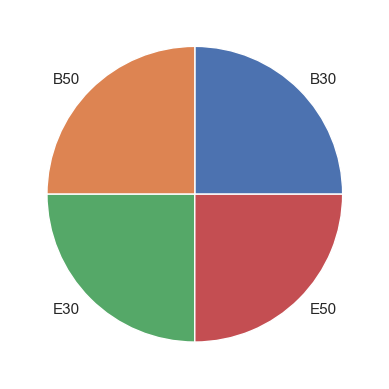

In [76]:
respondents.groupby('variant').size().plot.pie()

## Demographics

### Age

In [77]:
respondents.groupby('age').size()

age
18 - 24    32
25 - 34    54
35 - 44    42
45 - 54    25
55+         7
dtype: int64

<Axes: xlabel='age'>

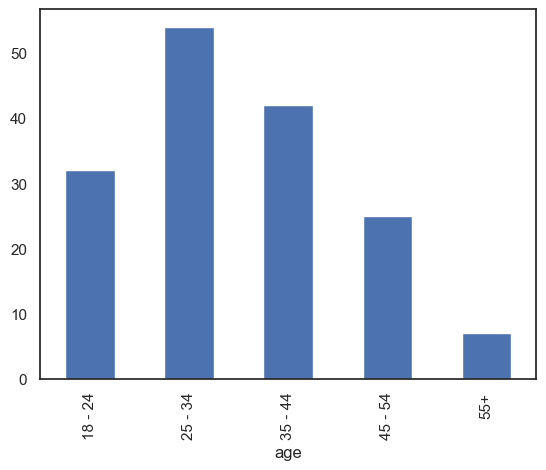

In [78]:
order=['18 - 24', '25 - 34', '35 - 44', '45 - 54', '55+']
respondents.groupby('age').size().loc[order].plot.bar()

variant  age    
B30      18 - 24     8
         25 - 34    13
         35 - 44    11
         45 - 54     6
         55+         2
B50      18 - 24     8
         25 - 34    14
         35 - 44    10
         45 - 54     6
         55+         2
E30      18 - 24     8
         25 - 34    14
         35 - 44    10
         45 - 54     6
         55+         2
E50      18 - 24     8
         25 - 34    13
         35 - 44    11
         45 - 54     7
         55+         1
dtype: int64


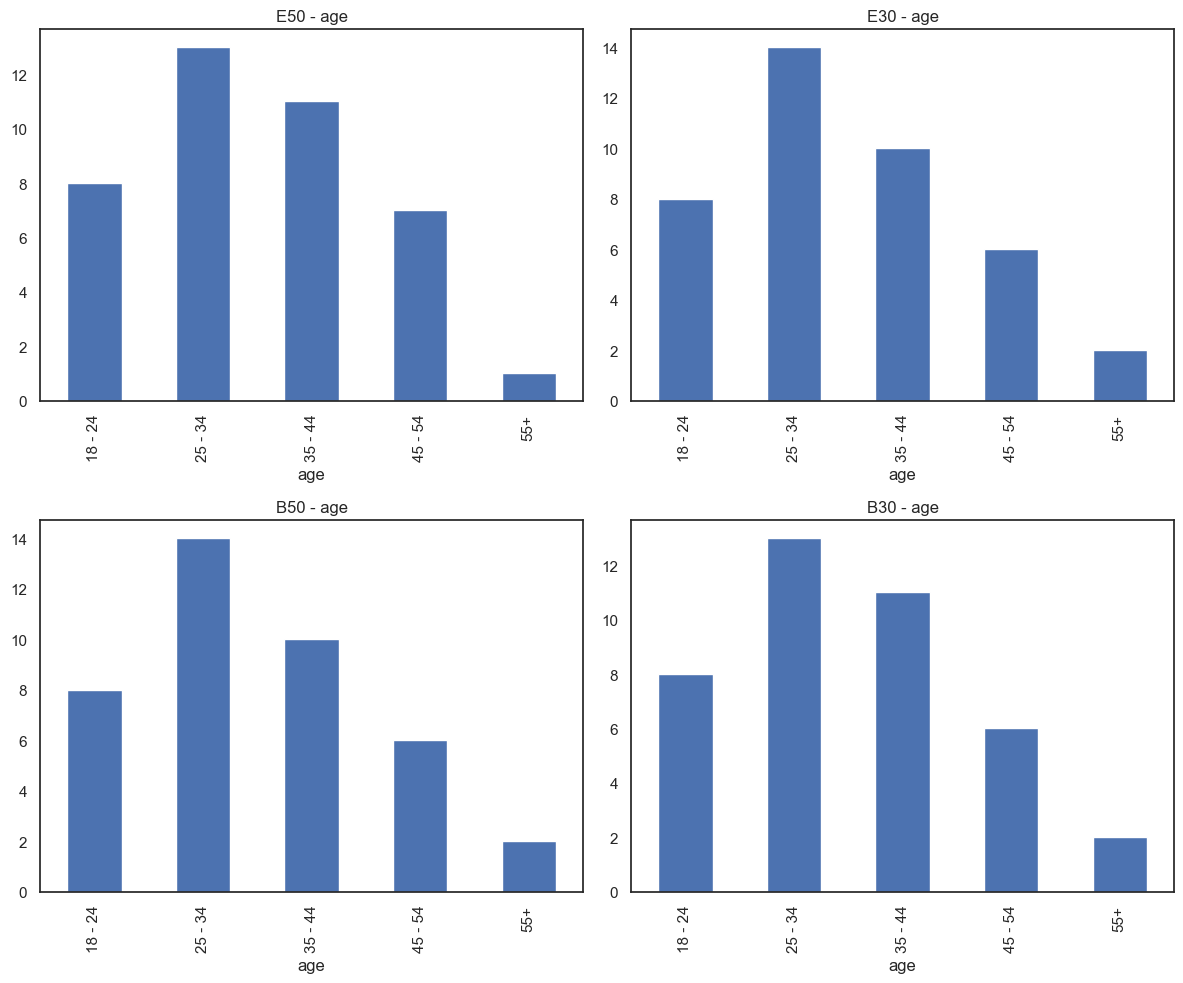

In [79]:
plotVariants(respondents, 'age', 'bar', order)

In [80]:
temp = np.array(respondents.groupby(['age', 'variant']).size().reset_index().pivot_table(index='age', columns='variant'))
temp[3] += temp[4] 
temp = temp[0:4]
chi2_contingency(temp)

Chi2ContingencyResult(statistic=np.float64(0.1693121693121693), pvalue=np.float64(0.9999997335842963), dof=9, expected_freq=array([[ 8. ,  8. ,  8. ,  8. ],
       [13.5, 13.5, 13.5, 13.5],
       [10.5, 10.5, 10.5, 10.5],
       [ 8. ,  8. ,  8. ,  8. ]]))

### Gender

In [81]:
respondents.groupby('gender').size()

gender
Man          80
Nonbinary     1
Woman        79
dtype: int64

<Axes: xlabel='gender'>

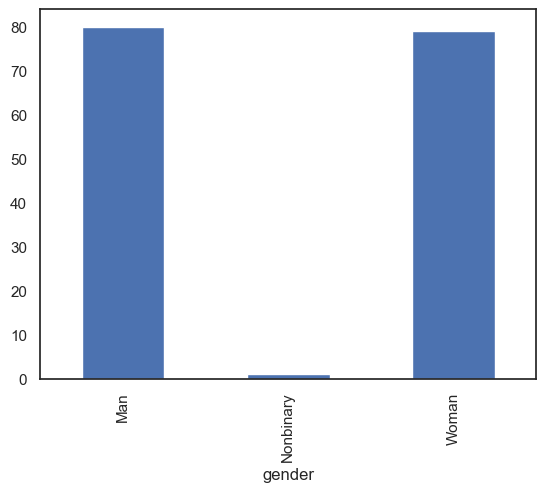

In [82]:
order=['Man', 'Woman', 'Nonbinary']
respondents.groupby('gender').size().plot.bar()

variant  gender   
B30      Man          20
         Nonbinary     1
         Woman        19
B50      Man          20
         Woman        20
E30      Man          20
         Woman        20
E50      Man          20
         Woman        20
dtype: int64


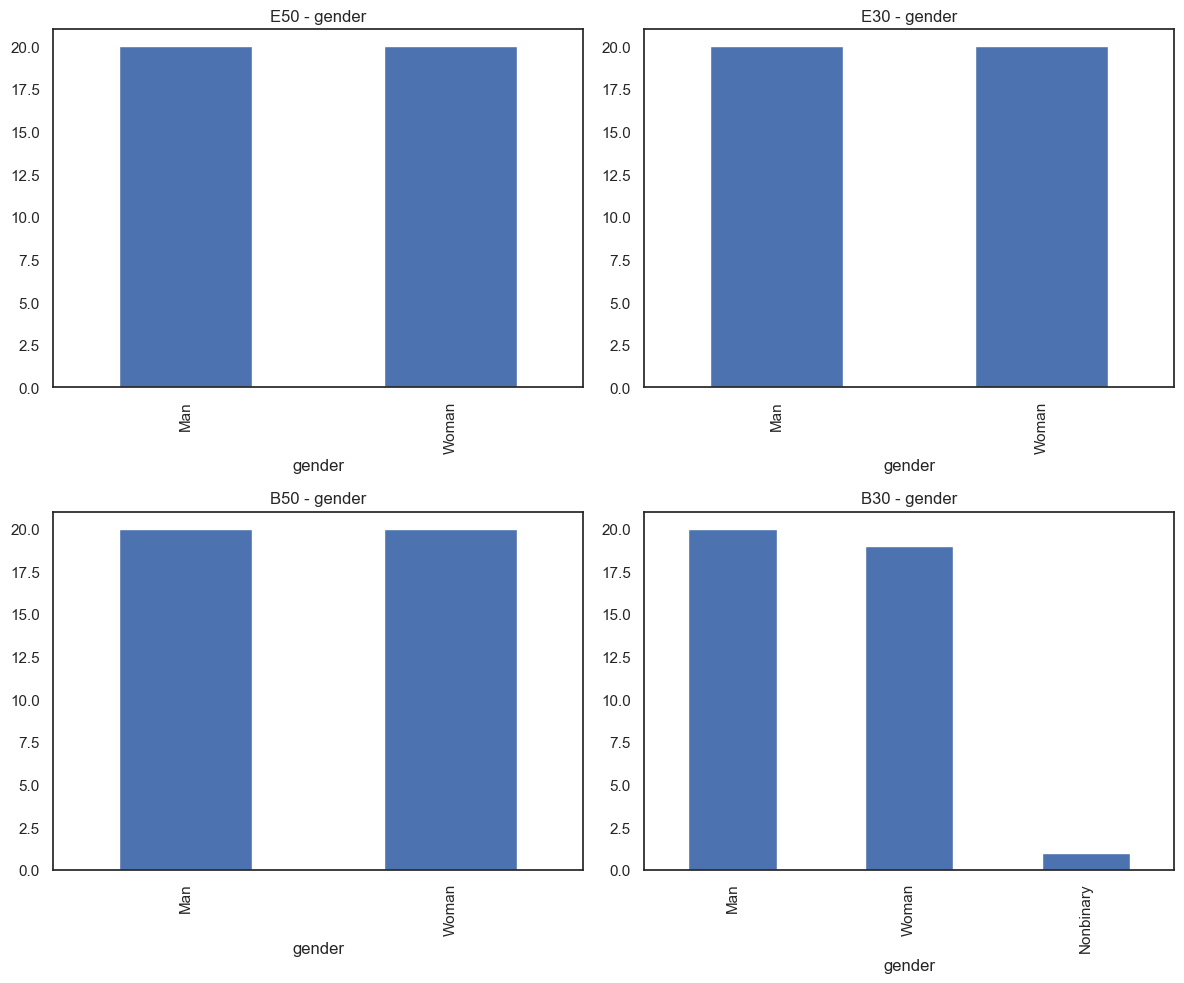

In [83]:
plotVariants(respondents, 'gender', 'bar', ['Man', 'Woman', 'Nonbinary'])

In [84]:
temp = np.array(respondents.groupby(['gender', 'variant']).size().reset_index().pivot_table(index='gender', columns='variant', fill_value=0))
temp[0] += temp[1] 
temp = np.delete(temp, 1, axis=0)
chi2_contingency(temp)

Chi2ContingencyResult(statistic=np.float64(0.07501172058134084), pvalue=np.float64(0.9946573058446219), dof=3, expected_freq=array([[20.25, 20.25, 20.25, 20.25],
       [19.75, 19.75, 19.75, 19.75]]))

### Education

In [85]:
respondents.groupby('education').size()

education
Doctoral degree                 8
Graduate degree                43
High school diploma            19
Secondary education            16
Technical/community college    12
Undergraduate degree           62
dtype: int64

<Axes: xlabel='education'>

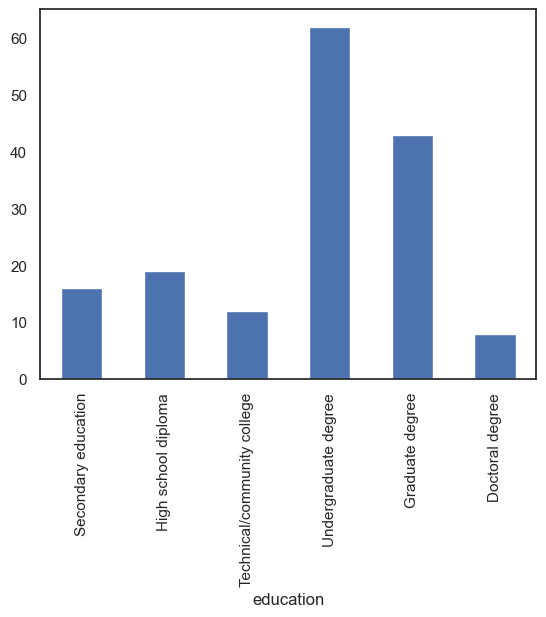

In [86]:
order=['Secondary education', 'High school diploma', 'Technical/community college', 'Undergraduate degree', 'Graduate degree',  'Doctoral degree']
respondents.groupby('education').size().loc[order].plot.bar()

variant  education                  
B30      Doctoral degree                 1
         Graduate degree                15
         High school diploma             3
         Secondary education             7
         Technical/community college     4
         Undergraduate degree           10
B50      Doctoral degree                 3
         Graduate degree                11
         High school diploma             4
         Secondary education             1
         Technical/community college     4
         Undergraduate degree           17
E30      Doctoral degree                 1
         Graduate degree                10
         High school diploma             6
         Secondary education             5
         Technical/community college     2
         Undergraduate degree           16
E50      Doctoral degree                 3
         Graduate degree                 7
         High school diploma             6
         Secondary education             3
         Technica

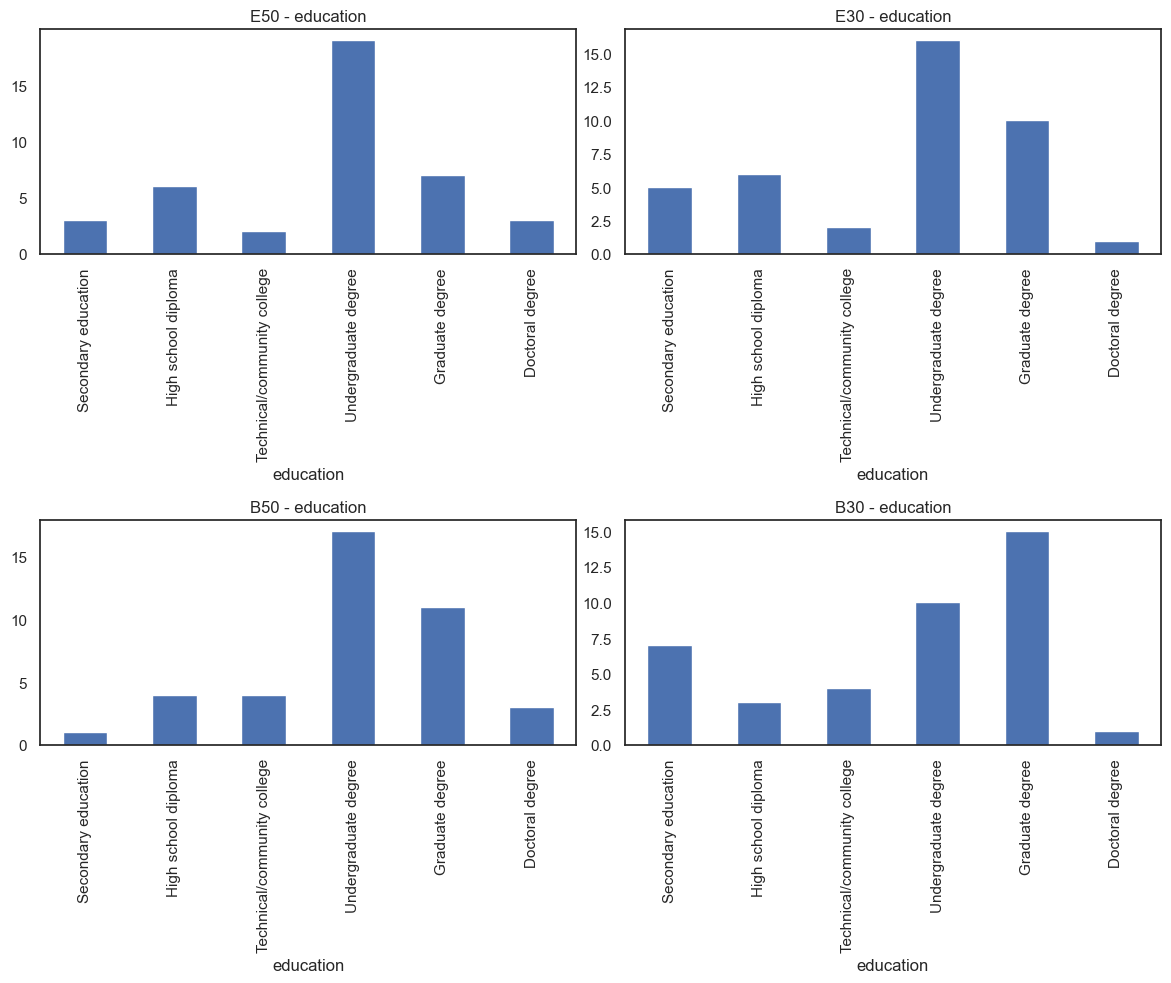

In [87]:
plotVariants(respondents, 'education', 'bar', order)

In [88]:
temp = respondents.groupby(['education', 'variant']).size().reset_index().pivot_table(index='education', columns='variant', fill_value=0)
temp

0                  
variant                       B30   B50   E30   E50
education                                          
Doctoral degree               1.0   3.0   1.0   3.0
Graduate degree              15.0  11.0  10.0   7.0
High school diploma           3.0   4.0   6.0   6.0
Secondary education           7.0   1.0   5.0   3.0
Technical/community college   4.0   4.0   2.0   2.0
Undergraduate degree         10.0  17.0  16.0  19.0

In [89]:
temp = np.array(temp)
temp[0] += temp[1] 
temp[2] += temp[3] + temp[4] 
temp = np.delete(temp, [1, 3, 4], axis=0)
chi2_contingency(temp)

Chi2ContingencyResult(statistic=np.float64(5.94285868087798), pvalue=np.float64(0.4296214847332569), dof=6, expected_freq=array([[12.75, 12.75, 12.75, 12.75],
       [11.75, 11.75, 11.75, 11.75],
       [15.5 , 15.5 , 15.5 , 15.5 ]]))

### Income

In [90]:
respondents.groupby('income').size()

income
More than £100,000     2
No income              7
£0 - £9,999           15
£10,000 - £19,999     19
£20,000 - £29,999     44
£30,000 - £39,999     29
£40,000 - £49,999     26
£50,000 - £74,999     12
£75,000 - £100,000     6
dtype: int64

<Axes: xlabel='income'>

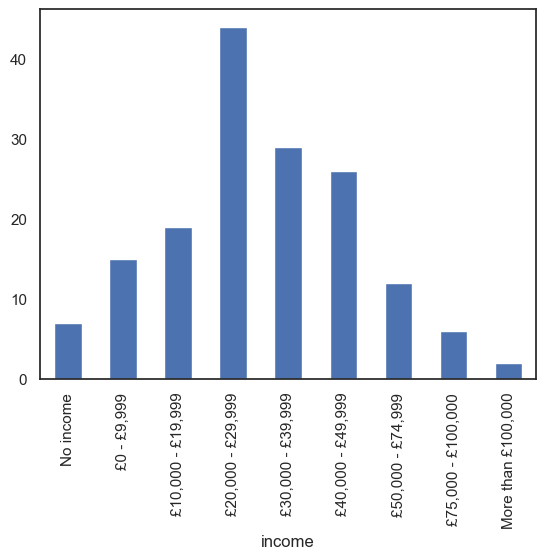

In [91]:
order=['No income', '£0 - £9,999', '£10,000 - £19,999', '£20,000 - £29,999', '£30,000 - £39,999', '£40,000 - £49,999', 
       '£50,000 - £74,999', '£75,000 - £100,000', 'More than £100,000']
respondents.groupby('income').size().loc[order].plot.bar()

In [92]:
respondents[respondents.variant=='E50'].groupby('education').size().index

Index(['Doctoral degree', 'Graduate degree', 'High school diploma',
       'Secondary education', 'Technical/community college',
       'Undergraduate degree'],
      dtype='object', name='education')

variant  income            
B30      More than £100,000     1
         No income              1
         £0 - £9,999            2
         £10,000 - £19,999      6
         £20,000 - £29,999     13
         £30,000 - £39,999      7
         £40,000 - £49,999      8
         £75,000 - £100,000     2
B50      No income              1
         £0 - £9,999            2
         £10,000 - £19,999      5
         £20,000 - £29,999     13
         £30,000 - £39,999      8
         £40,000 - £49,999      5
         £50,000 - £74,999      5
         £75,000 - £100,000     1
E30      No income              3
         £0 - £9,999            6
         £10,000 - £19,999      6
         £20,000 - £29,999      8
         £30,000 - £39,999      7
         £40,000 - £49,999      5
         £50,000 - £74,999      4
         £75,000 - £100,000     1
E50      More than £100,000     1
         No income              2
         £0 - £9,999            5
         £10,000 - £19,999      2
         £20,000 - £

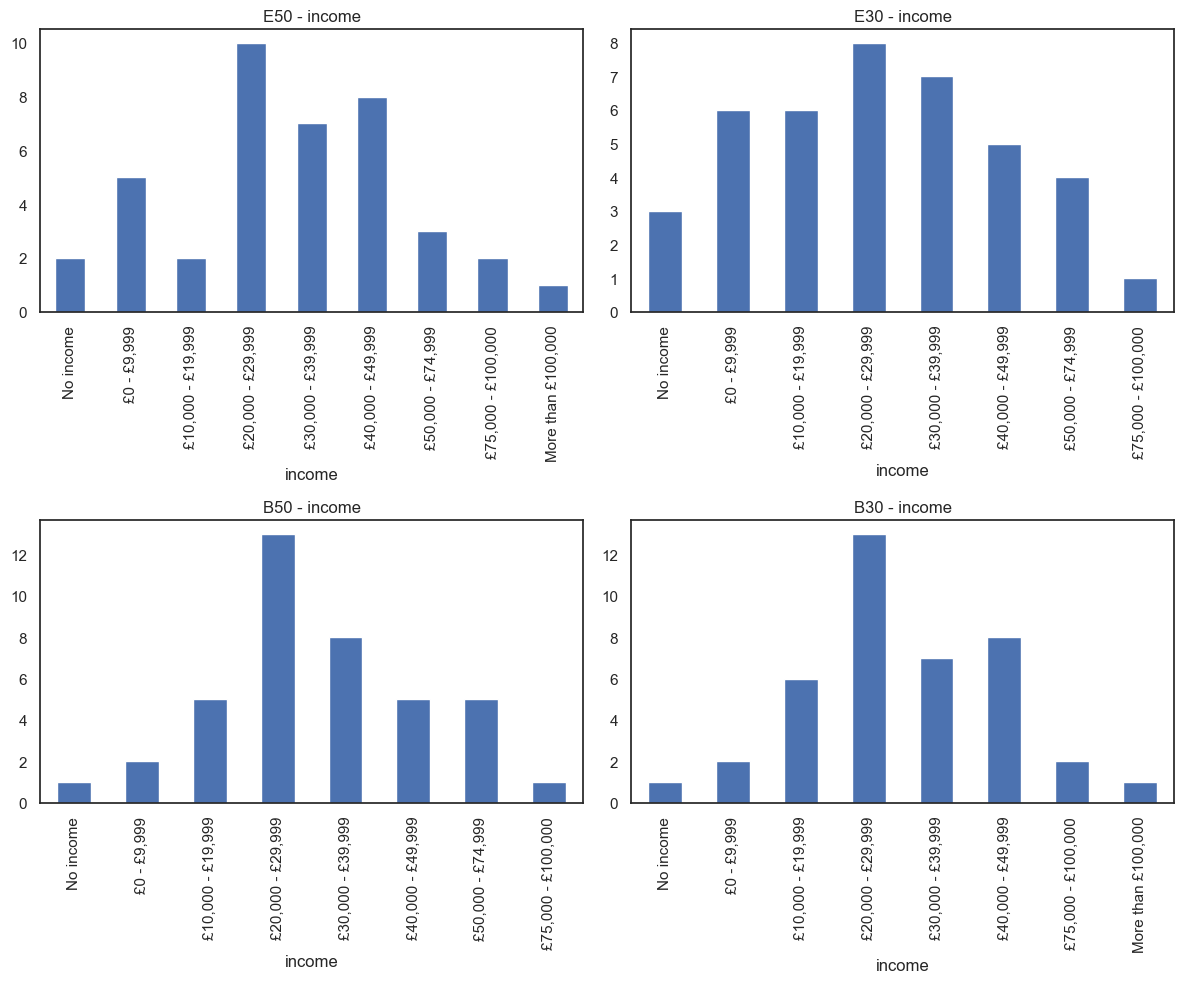

In [93]:
plotVariants(respondents, 'income', 'bar', order)

In [94]:
temp = respondents.groupby(['income', 'variant']).size().reset_index().pivot_table(index='income', columns='variant', fill_value=0)
temp

0                 
variant              B30   B50  E30   E50
income                                   
More than £100,000   1.0   0.0  0.0   1.0
No income            1.0   1.0  3.0   2.0
£0 - £9,999          2.0   2.0  6.0   5.0
£10,000 - £19,999    6.0   5.0  6.0   2.0
£20,000 - £29,999   13.0  13.0  8.0  10.0
£30,000 - £39,999    7.0   8.0  7.0   7.0
£40,000 - £49,999    8.0   5.0  5.0   8.0
£50,000 - £74,999    0.0   5.0  4.0   3.0
£75,000 - £100,000   2.0   1.0  1.0   2.0

In [95]:
temp = np.array(temp)
temp[1] += temp[2] + temp[3]
temp[0] += temp[7] + temp[8]
temp = np.delete(temp, [2, 3, 7, 8], axis=0)
chi2_contingency(temp)

Chi2ContingencyResult(statistic=np.float64(7.324427296841089), pvalue=np.float64(0.8354506458619267), dof=12, expected_freq=array([[ 5.  ,  5.  ,  5.  ,  5.  ],
       [10.25, 10.25, 10.25, 10.25],
       [11.  , 11.  , 11.  , 11.  ],
       [ 7.25,  7.25,  7.25,  7.25],
       [ 6.5 ,  6.5 ,  6.5 ,  6.5 ]]))

### Domain

In [96]:
respondents.groupby('domain').size()

domain
At least once a day      36
At least once a month    38
At least once a week     59
Less often               18
Multiple times a day      9
dtype: int64

<Axes: xlabel='domain'>

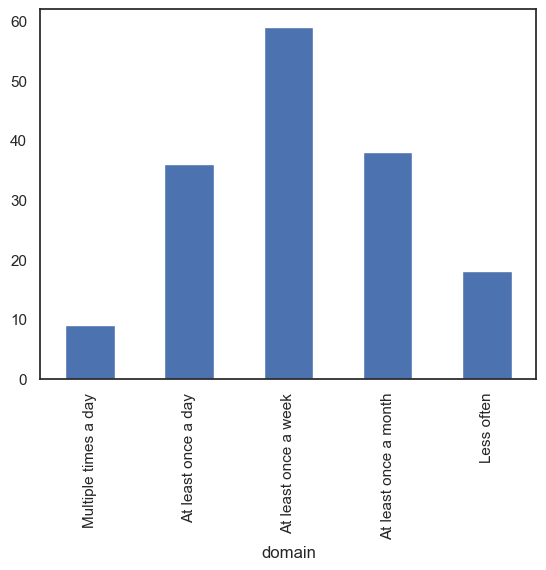

In [97]:
order=['Multiple times a day', 'At least once a day', 'At least once a week', 'At least once a month', 'Less often']
respondents.groupby('domain').size().loc[order].plot.bar()

variant  domain               
B30      At least once a day      11
         At least once a month     8
         At least once a week     15
         Less often                2
         Multiple times a day      4
B50      At least once a day      12
         At least once a month     4
         At least once a week     16
         Less often                4
         Multiple times a day      4
E30      At least once a day       4
         At least once a month    13
         At least once a week     16
         Less often                7
E50      At least once a day       9
         At least once a month    13
         At least once a week     12
         Less often                5
         Multiple times a day      1
dtype: int64


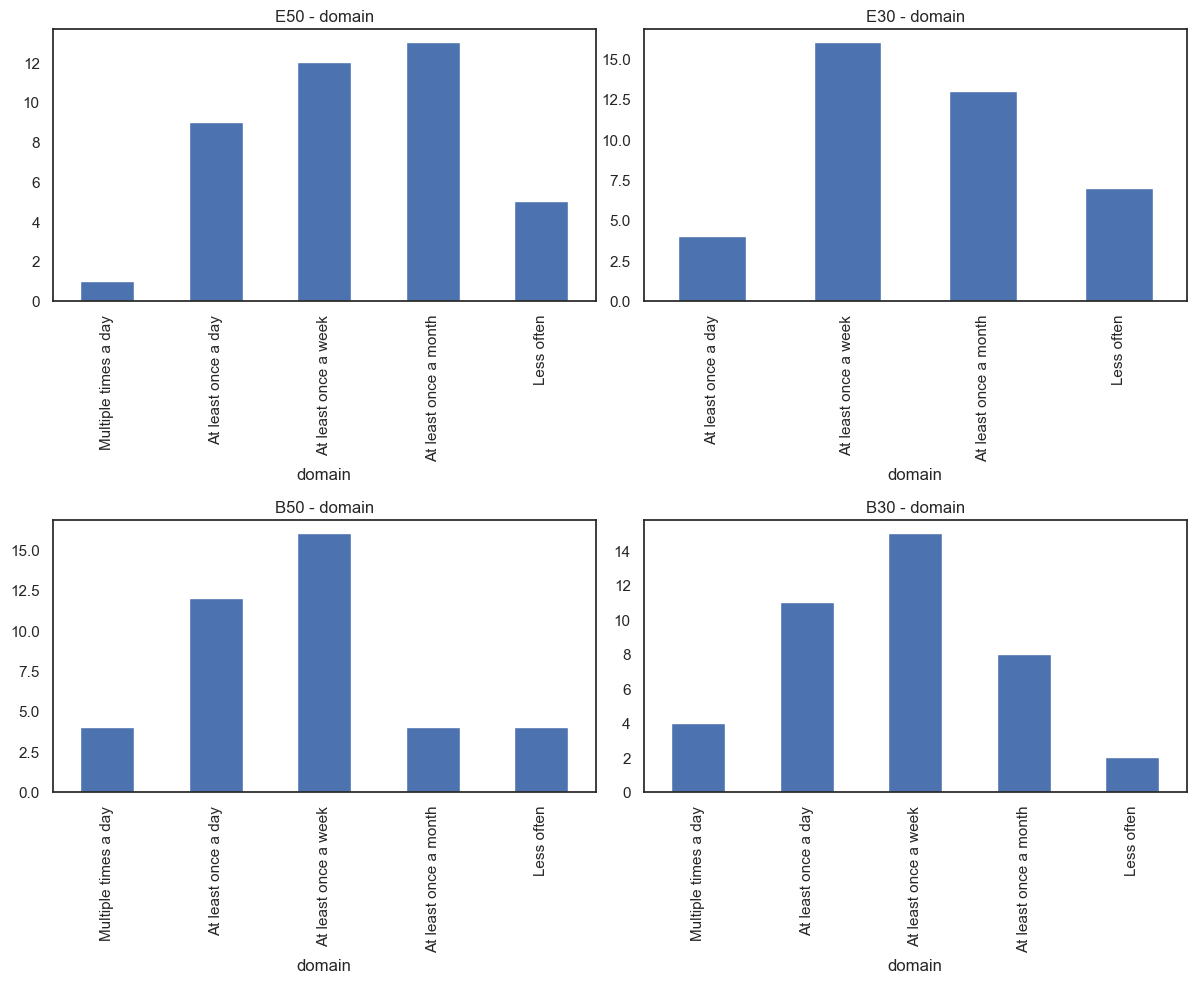

In [98]:
plotVariants(respondents, 'domain', 'bar', order)

In [99]:
temp = respondents.groupby(['domain', 'variant']).size().reset_index().pivot_table(index='domain', columns='variant', fill_value=0)
temp

0                  
variant                 B30   B50   E30   E50
domain                                       
At least once a day    11.0  12.0   4.0   9.0
At least once a month   8.0   4.0  13.0  13.0
At least once a week   15.0  16.0  16.0  12.0
Less often              2.0   4.0   7.0   5.0
Multiple times a day    4.0   4.0   0.0   1.0

In [100]:
temp = np.array(temp)

In [101]:
temp[1] += temp[3]
temp[0] += temp[4]
temp = np.delete(temp, [3, 4], axis=0)
stat, p, d, expect = chi2_contingency(temp)

In [102]:
print(stat, p, d)

16.224051654560128 0.01260059989030573 6


In [103]:
chi2_contingency([temp[:, 0], temp [:, 1]])

Chi2ContingencyResult(statistic=np.float64(0.2867383512544802), pvalue=np.float64(0.8664341434764087), dof=2, expected_freq=array([[15.5,  9. , 15.5],
       [15.5,  9. , 15.5]]))

In [104]:
chi2_contingency([temp[:, 2], temp [:, 3]])

Chi2ContingencyResult(statistic=np.float64(3.24812030075188), pvalue=np.float64(0.19709682956310584), dof=2, expected_freq=array([[ 7., 19., 14.],
       [ 7., 19., 14.]]))

## Task results

### No. of categories

In [105]:
respondents.groupby('categories').size()

categories
2      2
3     13
4     29
5     23
6     26
7     23
8     11
9     12
10    11
11     5
12     3
13     1
15     1
dtype: int64

<Axes: xlabel='categories'>

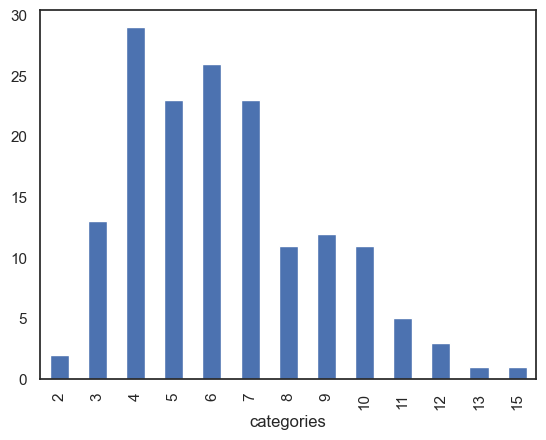

In [106]:
respondents.groupby('categories').size().plot.bar()

variant  categories
B30      3             4
         4             9
         5             6
         6             9
         7             4
         8             1
         9             1
         10            4
         11            1
         12            1
B50      3             1
         4             3
         5             4
         6             7
         7             5
         8             5
         9             6
         10            5
         11            1
         12            2
         13            1
E30      2             1
         3             5
         4             9
         5             5
         6             6
         7             5
         8             4
         9             3
         10            1
         15            1
E50      2             1
         3             3
         4             8
         5             8
         6             4
         7             9
         8             1
         9             2
     

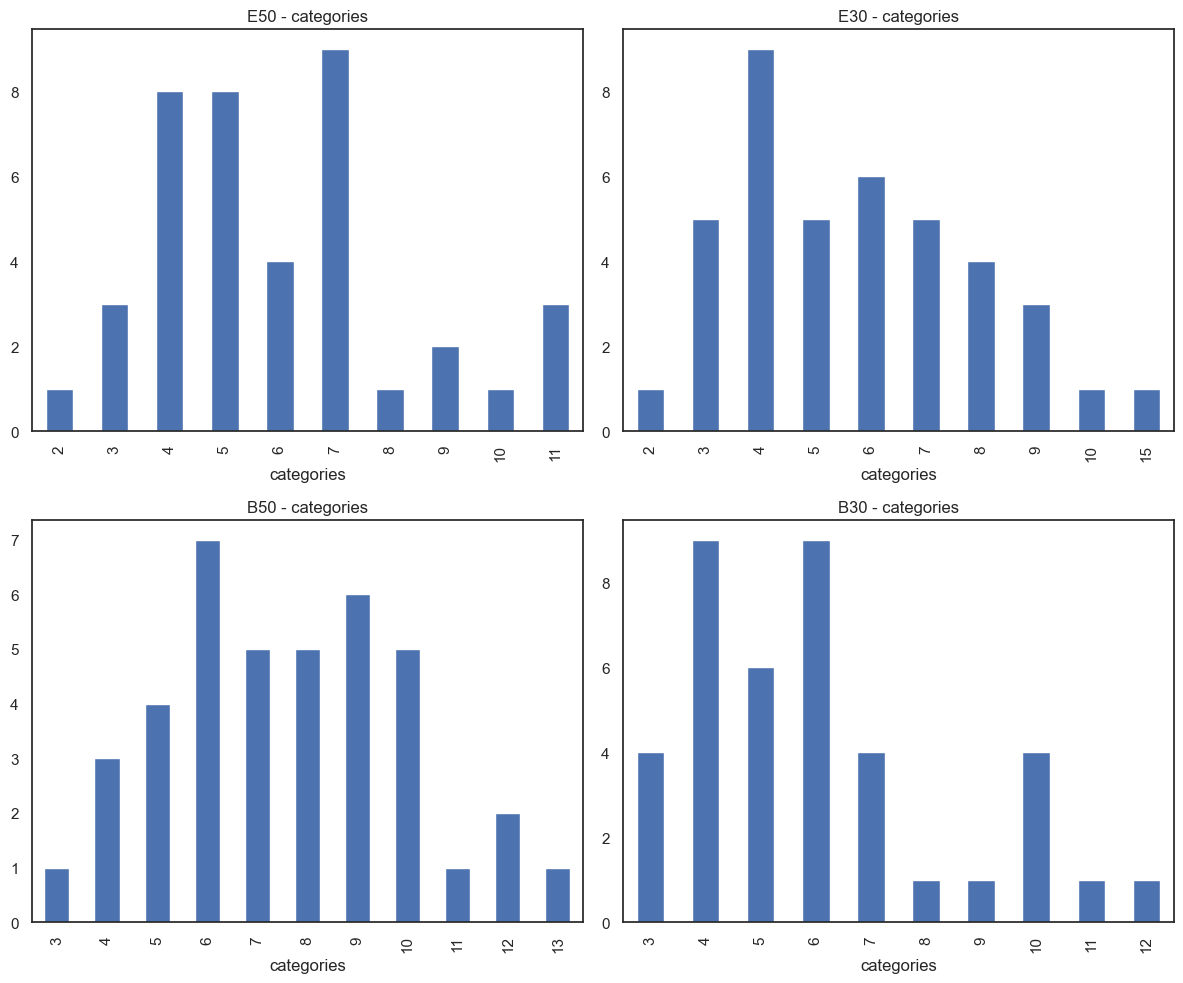

In [107]:
plotVariants(respondents, 'categories', 'bar')

In [108]:
respondents.categories.agg(['mean', 'std', 'min', 'max', 'median'])

mean       6.350000
std        2.485682
min        2.000000
max       15.000000
median     6.000000
Name: categories, dtype: float64

In [109]:
respondents[['variant', 'categories']].groupby('variant').agg(['mean', 'std', 'min', 'max', 'median'])

categories                         
              mean       std min max median
variant                                    
B30          6.000  2.375084   3  12    6.0
B50          7.600  2.415760   3  13    7.5
E30          5.825  2.510363   2  15    5.5
E50          5.975  2.292546   2  11    5.5

In [110]:
respondents[['variant', 'categories']].groupby('variant').quantile([.25, .5, .75])

categories
variant                 
B30     0.25         4.0
        0.50         6.0
        0.75         7.0
B50     0.25         6.0
        0.50         7.5
        0.75         9.0
E30     0.25         4.0
        0.50         5.5
        0.75         7.0
E50     0.25         4.0
        0.50         5.5
        0.75         7.0

/var/folders/3m/cjzjfzb55vz43fmr0ny8vj6w0000gn/T/ipykernel_94798/1294672488.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["Full-E", "Subset-E", "Full-B", "Subset-B"], fontsize=11)


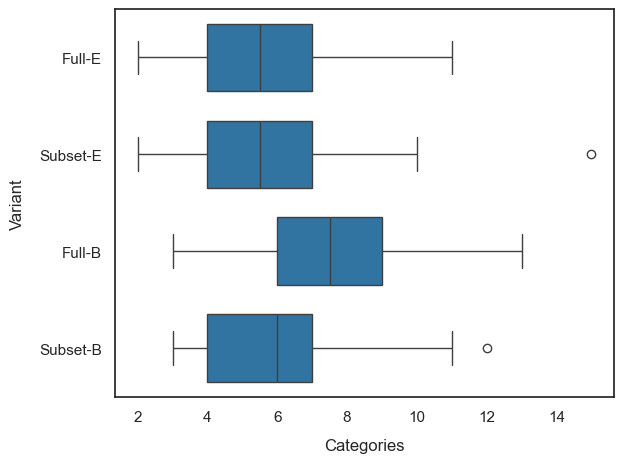

In [111]:
ax = sns.boxplot(data=respondents, x='categories', y='variant', color="#1f77b4", width=0.7)
ax.set_xlabel("Categories", fontsize=12, labelpad=10)
ax.set_ylabel("Variant", fontsize=12, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_yticklabels(["Full-E", "Subset-E", "Full-B", "Subset-B"], fontsize=11)
plt.tight_layout()

### Time

<Axes: ylabel='Frequency'>

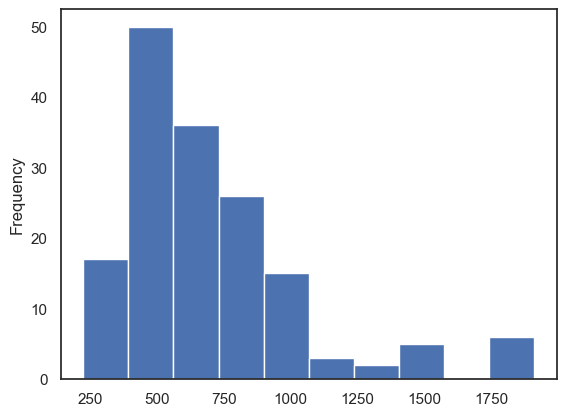

In [112]:
respondents.time.plot.hist()

variant  time
B30      306     1
         327     1
         342     1
         388     1
         394     1
                ..
E50      971     1
         1001    1
         1065    1
         1129    1
         1818    1
Length: 156, dtype: int64


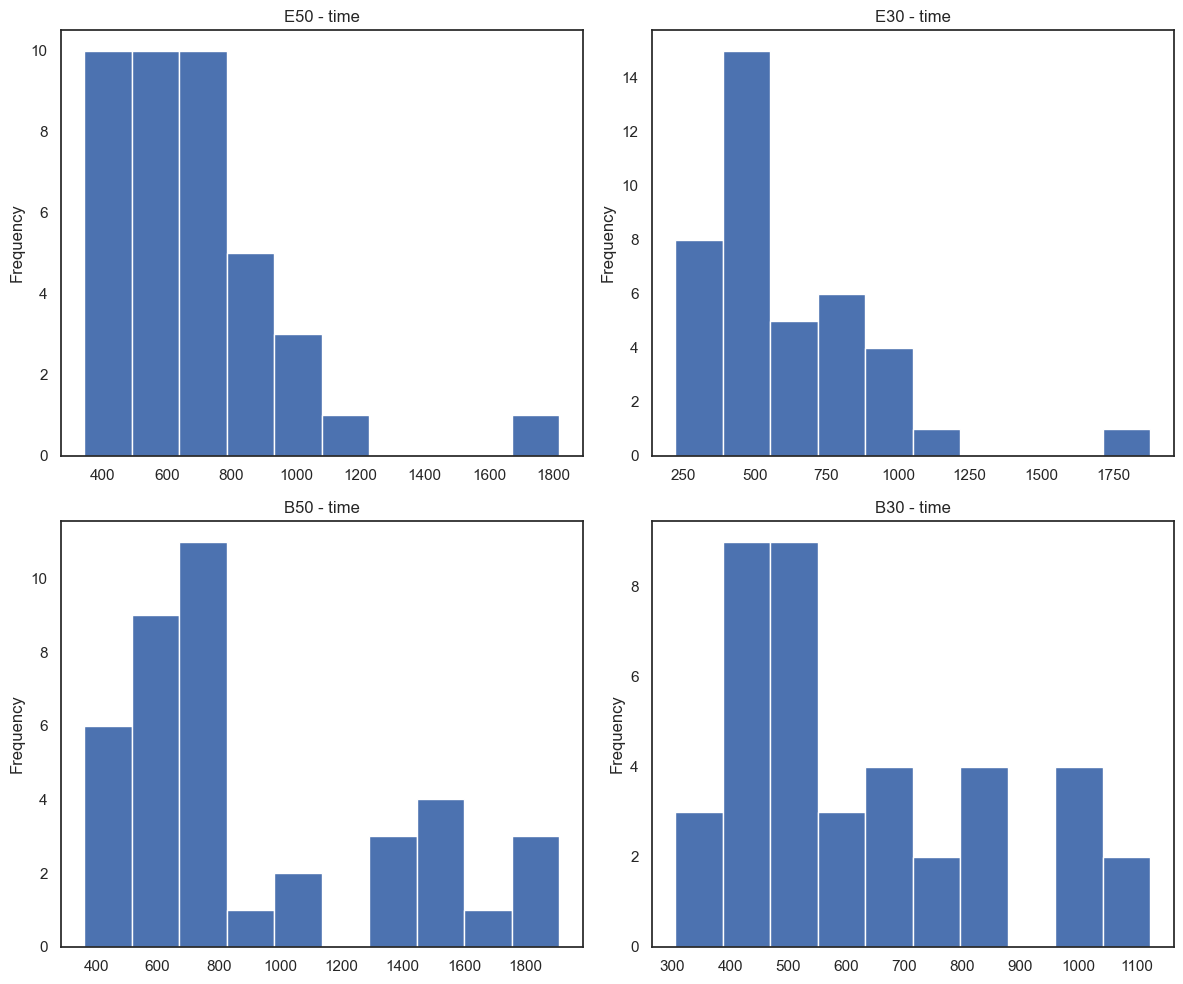

In [113]:
plotVariants(respondents, 'time', 'hist')

In [114]:
respondents.time.agg(['mean', 'std', 'min', 'max', 'median'])

mean       704.468750
std        347.104989
min        224.000000
max       1911.000000
median     611.000000
Name: time, dtype: float64

In [115]:
respondents[['variant', 'time']].groupby('variant').agg(['mean', 'std', 'min', 'max', 'median'])

time                              
            mean         std  min   max median
variant                                       
B30      624.275  221.391982  306  1124  539.5
B50      922.375  455.303882  362  1911  748.5
E30      604.775  304.374810  224  1880  543.0
E50      666.450  274.340136  343  1818  633.0

In [116]:
respondents[['variant', 'time']].groupby('variant').quantile([.25, .5, .75])

time
variant              
B30     0.25   457.75
        0.50   539.50
        0.75   757.00
B50     0.25   584.75
        0.50   748.50
        0.75  1324.25
E30     0.25   404.00
        0.50   543.00
        0.75   783.50
E50     0.25   477.00
        0.50   633.00
        0.75   778.25

/var/folders/3m/cjzjfzb55vz43fmr0ny8vj6w0000gn/T/ipykernel_94798/2963301912.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["Full-E", "Subset-E", "Full-B", "Subset-B"], fontsize=11)


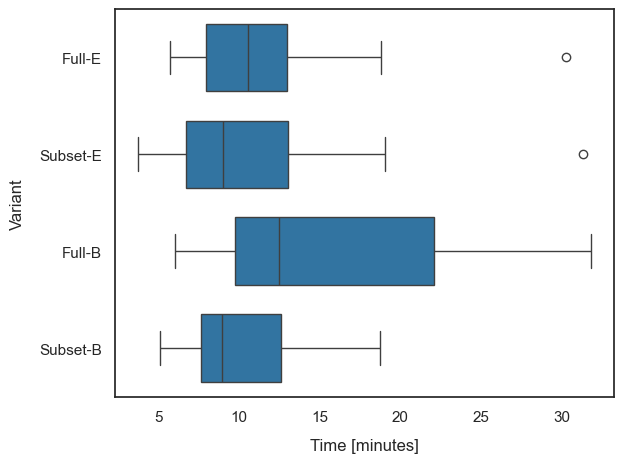

In [117]:
ax = sns.boxplot(data=respondents.assign(timeMinutes=respondents["time"]/60), x='timeMinutes', y='variant', color="#1f77b4", width=0.7)
ax.set_xlabel("Time [minutes]", fontsize=12, labelpad=10)
ax.set_ylabel("Variant", fontsize=12, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_yticklabels(["Full-E", "Subset-E", "Full-B", "Subset-B"], fontsize=11)
plt.tight_layout()

## CRT

<Axes: ylabel='Frequency'>

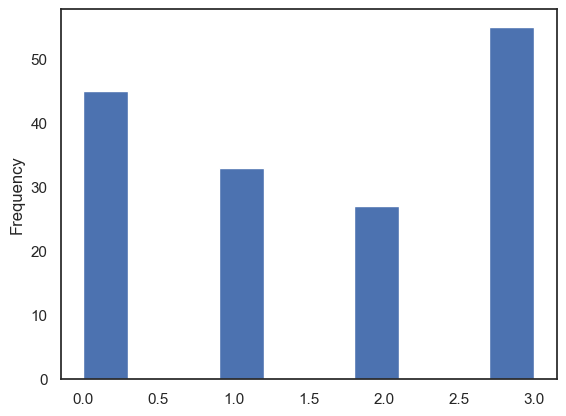

In [118]:
respondents.crt.plot.hist()

variant  crt
B30      0      12
         1      11
         2       7
         3      10
B50      0       7
         1       6
         2       8
         3      19
E30      0      16
         1       6
         2       7
         3      11
E50      0      10
         1      10
         2       5
         3      15
dtype: int64


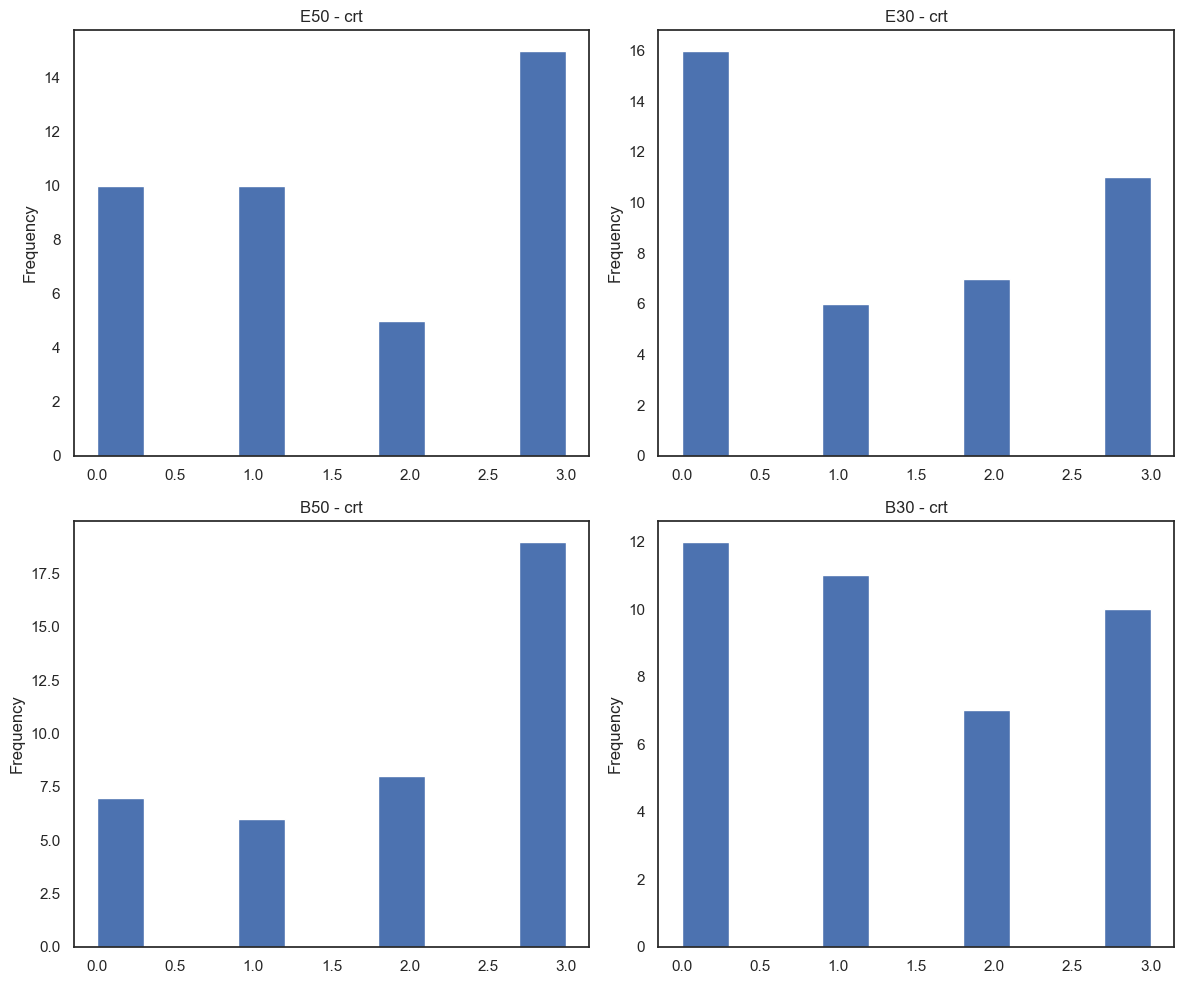

In [119]:
plotVariants(respondents, 'crt', 'hist')

In [120]:
respondents.crt.agg(['mean', 'std', 'min', 'max', 'median'])

mean      1.575000
std       1.226284
min       0.000000
max       3.000000
median    2.000000
Name: crt, dtype: float64

In [121]:
respondents[['variant', 'crt']].groupby('variant').agg(['mean', 'std', 'min', 'max', 'median'])

crt                         
          mean       std min max median
variant                                
B30      1.375  1.169867   0   3    1.0
B50      1.975  1.165476   0   3    2.0
E30      1.325  1.268706   0   3    1.0
E50      1.625  1.233870   0   3    1.5

In [122]:
mannwhitneyu(
    respondents[(respondents.variant=='E50') | (respondents.variant=='B50')]['crt'], 
    respondents[(respondents.variant=='E30') | (respondents.variant=='B30')]['crt']
)

MannwhitneyuResult(statistic=np.float64(3861.0), pvalue=np.float64(0.019005627872266728))

In [123]:
chi2_contingency([[26, 16, 12, 26], [19, 17, 15, 29]])

Chi2ContingencyResult(statistic=np.float64(1.616161616161616), pvalue=np.float64(0.655730859114982), dof=3, expected_freq=array([[22.5, 16.5, 13.5, 27.5],
       [22.5, 16.5, 13.5, 27.5]]))

In [124]:
chi2_contingency([[28, 17, 14, 21], [17, 16, 13, 34]])

Chi2ContingencyResult(statistic=np.float64(5.82895622895623), pvalue=np.float64(0.12023497964928614), dof=3, expected_freq=array([[22.5, 16.5, 13.5, 27.5],
       [22.5, 16.5, 13.5, 27.5]]))

## Big-5

In [125]:
respondents[['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind']].agg(['mean', 'std', 'min', 'max', 'median'])

,bfExtra,bfAgree,bfConsc,bfNegEmo,bfOpenMind
mean,8.231250,11.325000,10.762500,8.71250,10.56875
std,2.587395,2.023603,2.353874,2.86024,2.25601
min,3.000000,4.000000,5.000000,3.00000,5.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000
median,8.000000,12.000000,11.000000,9.00000,11.00000


In [126]:
respondents[['variant', 'bfExtra', 'bfAgree', 'bfConsc']].groupby('variant').agg(['mean', 'std', 'min', 'max', 'median'])

bfExtra                          bfAgree                           \
           mean       std min max median    mean       std min max median   
variant                                                                     
B30       7.950  2.521192   3  14    8.0  11.575  1.985686   4  15   12.0   
B50       8.225  2.796403   3  15    8.0  11.775  1.967525   8  15   12.0   
E30       7.825  2.363043   3  12    7.5  10.975  1.860349   7  15   11.0   
E50       8.925  2.605591   4  13   10.0  10.975  2.212870   5  14   11.5   

        bfConsc                           
           mean       std min max median  
variant                                   
B30      10.900  2.383705   7  15   11.0  
B50      11.300  2.186204   7  15   11.5  
E30      10.225  2.485728   5  15   10.0  
E50      10.625  2.305929   5  15   11.0

In [127]:
respondents[['variant', 'bfNegEmo', 'bfOpenMind']].groupby('variant').agg(['mean', 'std', 'min', 'max', 'median'])

bfNegEmo                          bfOpenMind                         
            mean       std min max median       mean       std min max median
variant                                                                      
B30        9.200  3.022989   3  14    9.0     10.975  1.954449   7  15   11.0
B50        8.475  2.601651   3  15    8.5     11.050  2.297713   5  15   11.0
E30        8.500  2.717465   3  13    8.5     10.050  2.363722   5  15   10.0
E50        8.675  3.116437   4  15    8.5     10.200  2.289329   6  15   10.0

In [128]:
for i in ['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind']:
    print(mannwhitneyu(
        respondents[(respondents.variant=='E50') | (respondents.variant=='B50')][i], 
        respondents[(respondents.variant=='E30') | (respondents.variant=='B30')][i]
    ))

MannwhitneyuResult(statistic=np.float64(3661.5), pvalue=np.float64(0.11321686075352774))
MannwhitneyuResult(statistic=np.float64(3337.5), pvalue=np.float64(0.6353678440868705))
MannwhitneyuResult(statistic=np.float64(3532.0), pvalue=np.float64(0.25395644436480647))
MannwhitneyuResult(statistic=np.float64(3013.0), pvalue=np.float64(0.5222699680716875))
MannwhitneyuResult(statistic=np.float64(3284.0), pvalue=np.float64(0.7737520988841465))


### Extraversion

variant  bfExtra
B30      3           1
         4           2
         5           5
         6           2
         7           6
         8          11
         9           4
         10          2
         11          3
         12          2
         13          1
         14          1
B50      3           1
         4           2
         5           4
         6           1
         7          10
         8           5
         9           9
         10          1
         11          1
         12          2
         13          1
         14          2
         15          1
E30      3           1
         4           2
         5           3
         6           7
         7           7
         8           5
         9           3
         10          5
         11          5
         12          2
E50      4           2
         5           3
         6           5
         7           2
         8           5
         9           2
         10          8
         11      

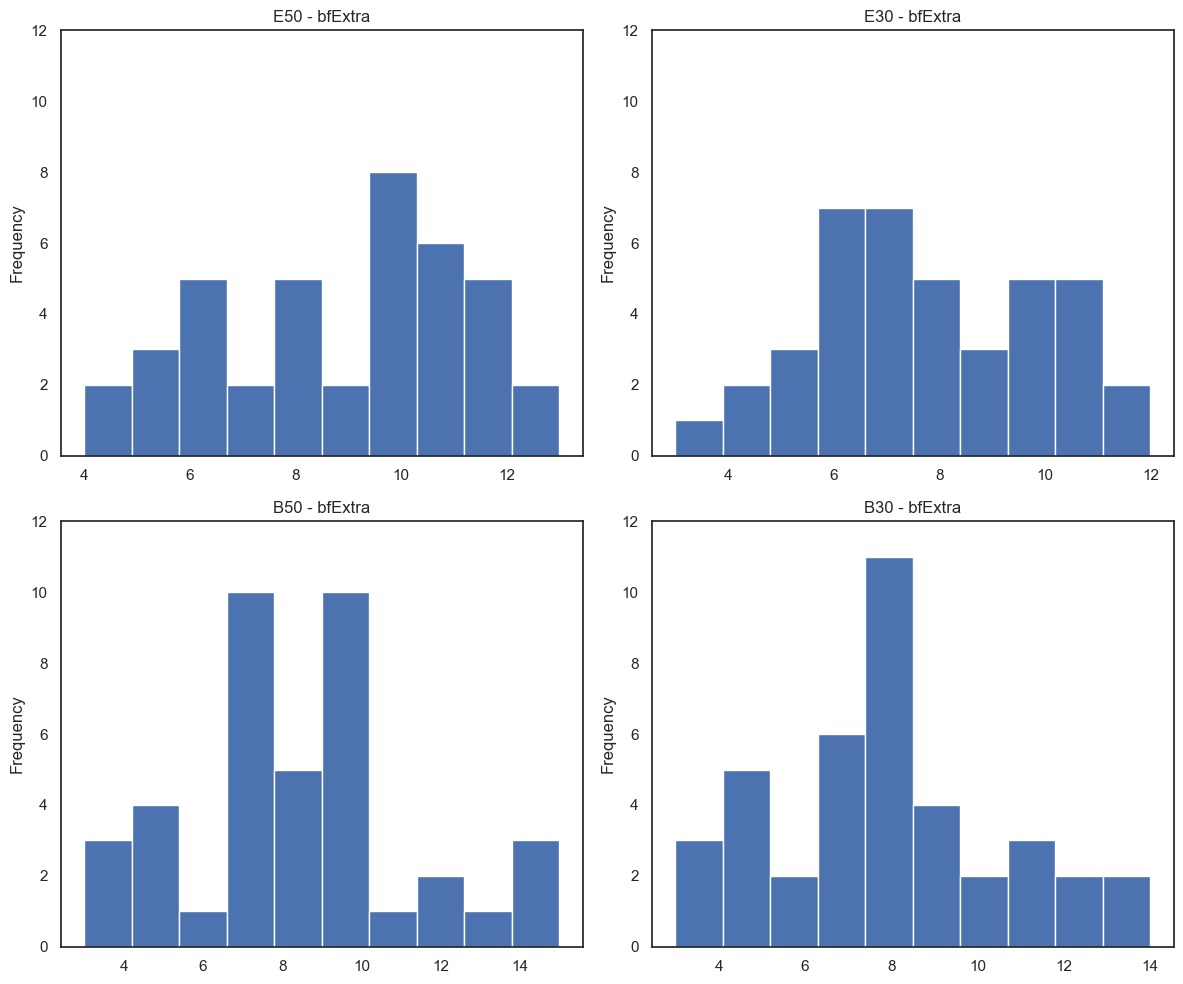

In [129]:
plotVariants(respondents, 'bfExtra', 'hist', maxY=12)

### Agreeableness

variant  bfAgree
B30      4           1
         8           2
         9           1
         10          5
         11          6
         12         12
         13          9
         14          3
         15          1
B50      8           3
         9           2
         10          6
         11          6
         12          7
         13          9
         14          3
         15          4
E30      7           2
         9           7
         10          8
         11          6
         12         10
         13          4
         14          1
         15          2
E50      5           1
         6           2
         8           1
         9           5
         10          6
         11          5
         12         10
         13          6
         14          4
dtype: int64


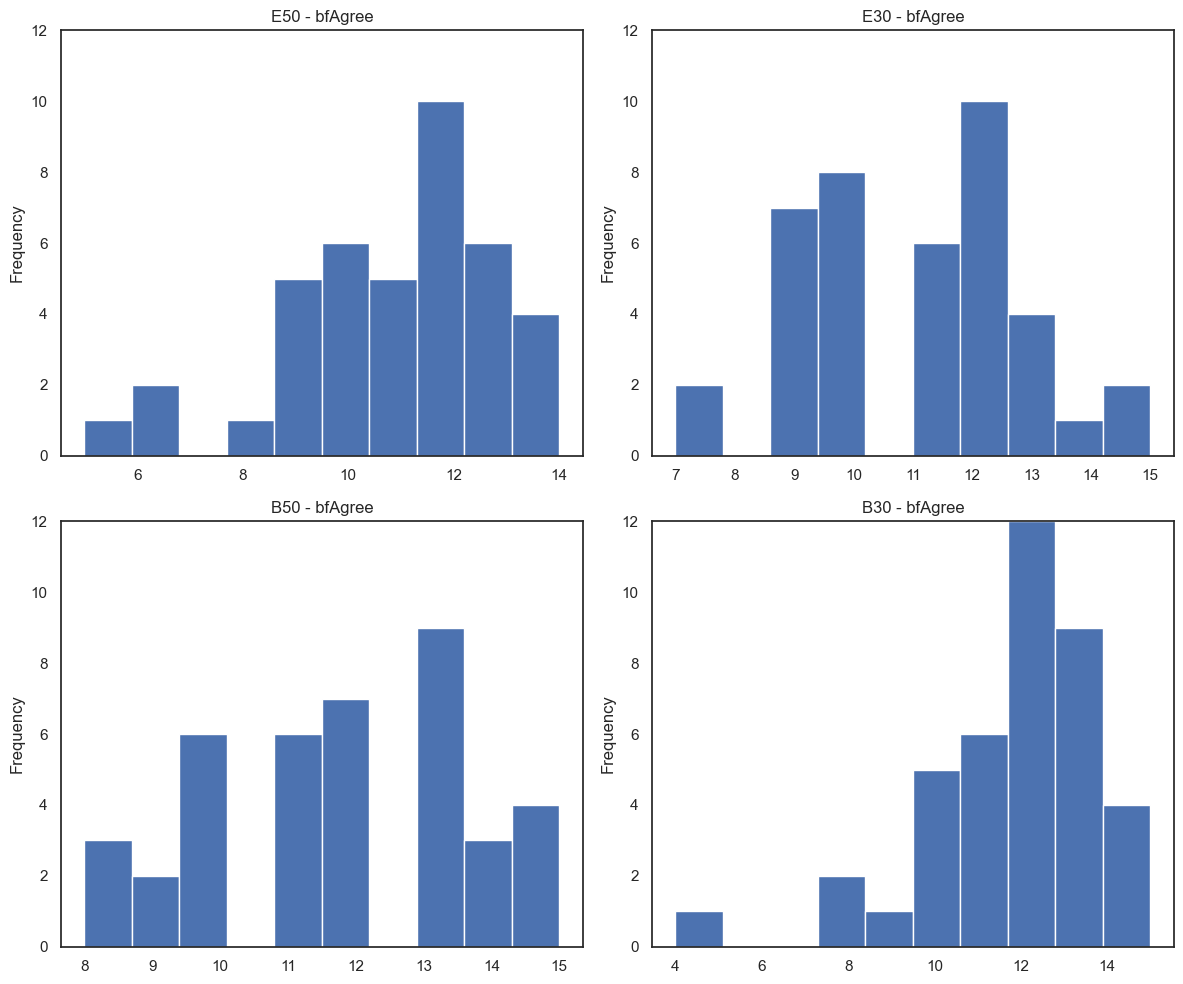

In [130]:
plotVariants(respondents, 'bfAgree', 'hist', maxY=12)

### Conscientiousness

variant  bfConsc
B30      7           3
         8           4
         9           6
         10          6
         11          5
         12          4
         13          5
         14          4
         15          3
B50      7           2
         8           3
         9           2
         10          9
         11          4
         12          9
         13          3
         14          5
         15          3
E30      5           1
         6           3
         7           2
         8           4
         9           3
         10         10
         11          4
         12          5
         13          4
         14          3
         15          1
E50      5           1
         6           1
         7           2
         8           5
         9           3
         10          3
         11          8
         12         10
         13          4
         14          2
         15          1
dtype: int64


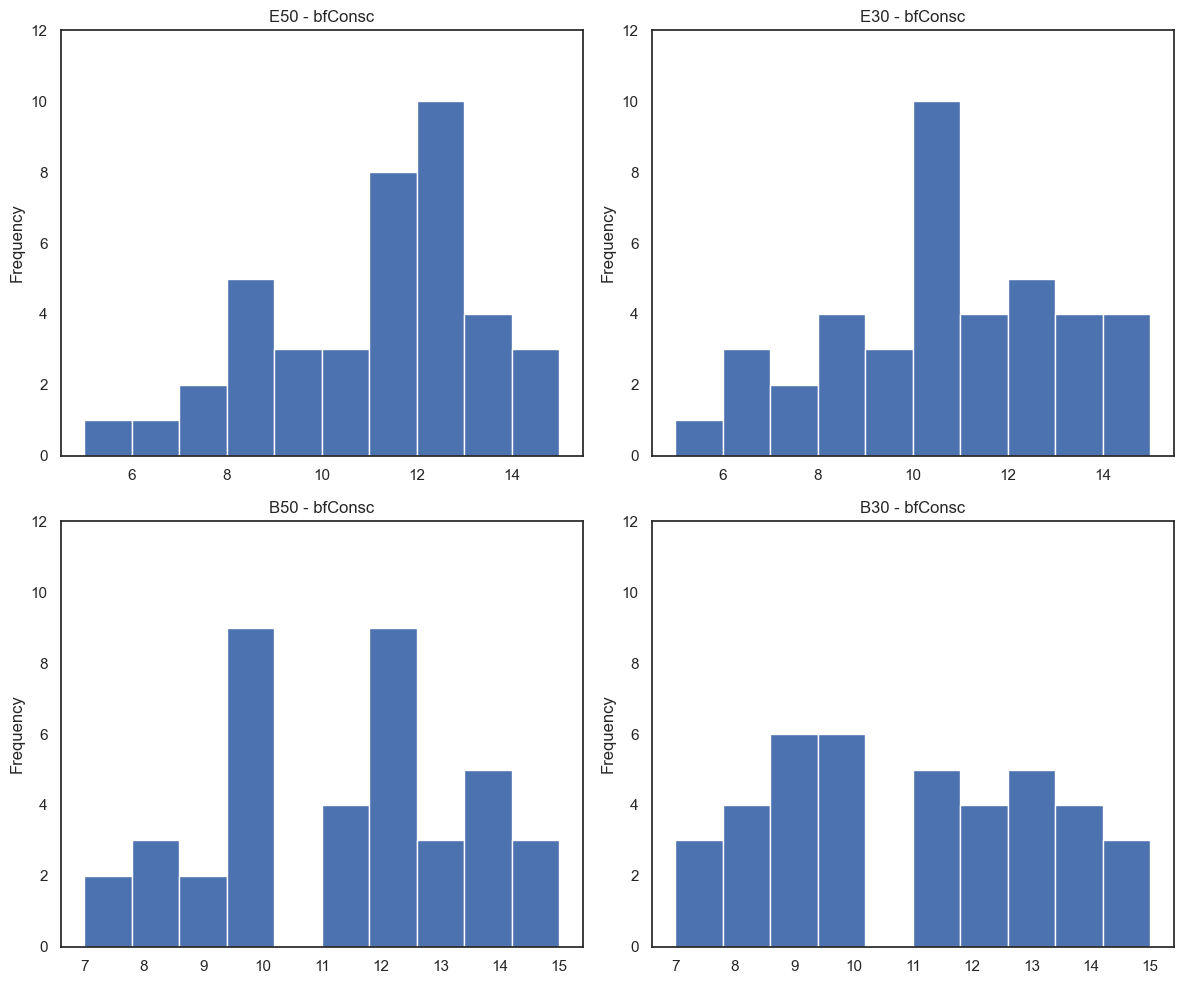

In [131]:
plotVariants(respondents, 'bfConsc', 'hist', maxY=12)

### Negative Emotionality

variant  bfNegEmo
B30      3           1
         4           1
         5           2
         6           5
         7           2
         8           8
         9           3
         10          5
         11          2
         12          3
         13          4
         14          4
B50      3           1
         4           1
         5           3
         6           4
         7           6
         8           5
         9           6
         10          7
         11          2
         12          2
         13          2
         15          1
E30      3           1
         4           2
         5           3
         6           4
         7           6
         8           4
         9           4
         10          5
         11          5
         12          3
         13          3
E50      4           4
         5           5
         6           2
         7           2
         8           7
         9           5
         10          4
         11     

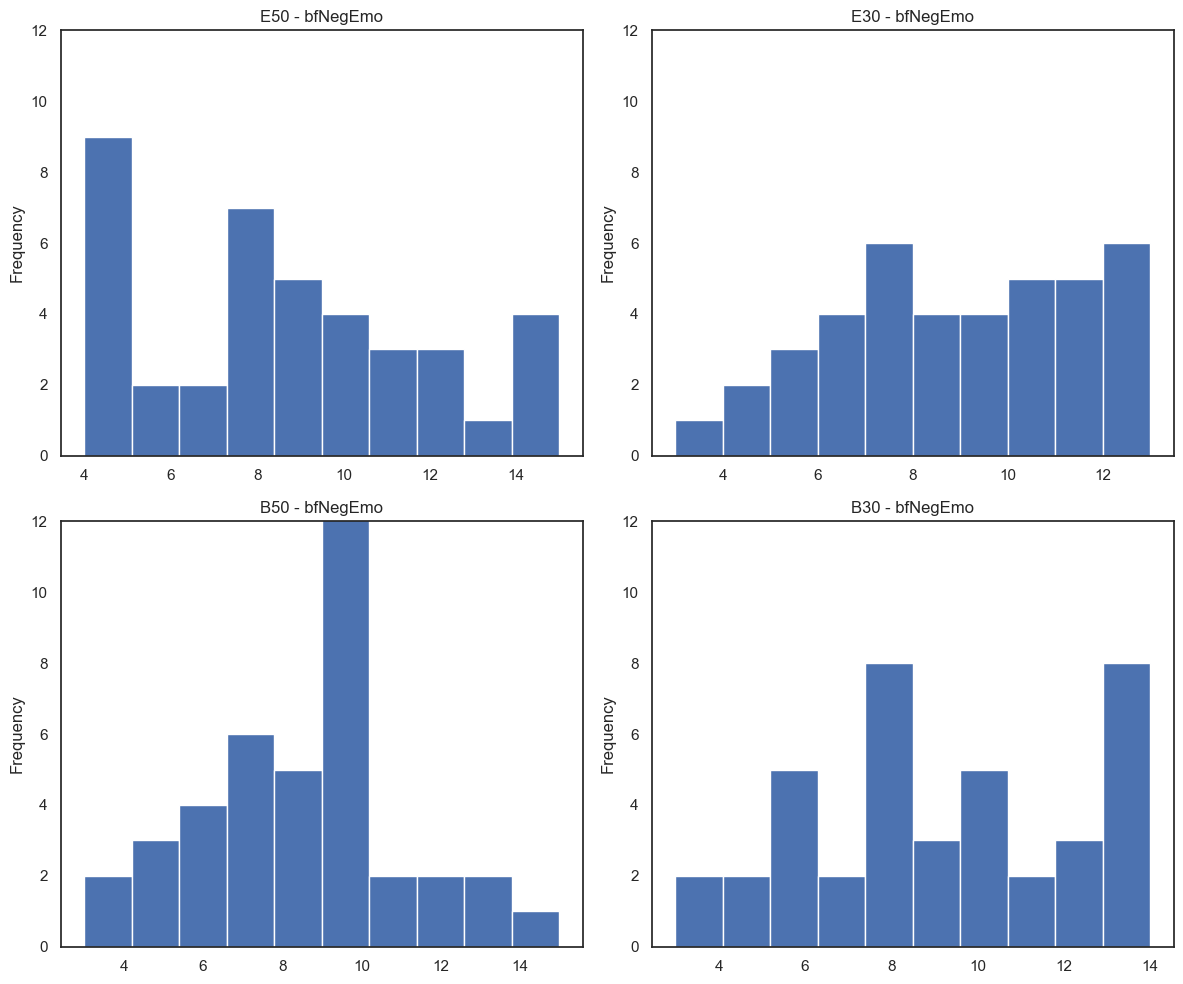

In [132]:
plotVariants(respondents, 'bfNegEmo', 'hist', maxY=12)

### Open-Mindednes

variant  bfOpenMind
B30      7              1
         8              4
         9              6
         10             4
         11             7
         12            10
         13             4
         14             3
         15             1
B50      5              1
         7              2
         9              7
         10             7
         11             6
         12             6
         13             6
         14             1
         15             4
E30      5              1
         6              2
         7              3
         8              3
         9              9
         10             5
         11             5
         12             6
         13             3
         14             2
         15             1
E50      6              3
         7              2
         8              6
         9              2
         10             8
         11             9
         12             3
         13             4
         14       

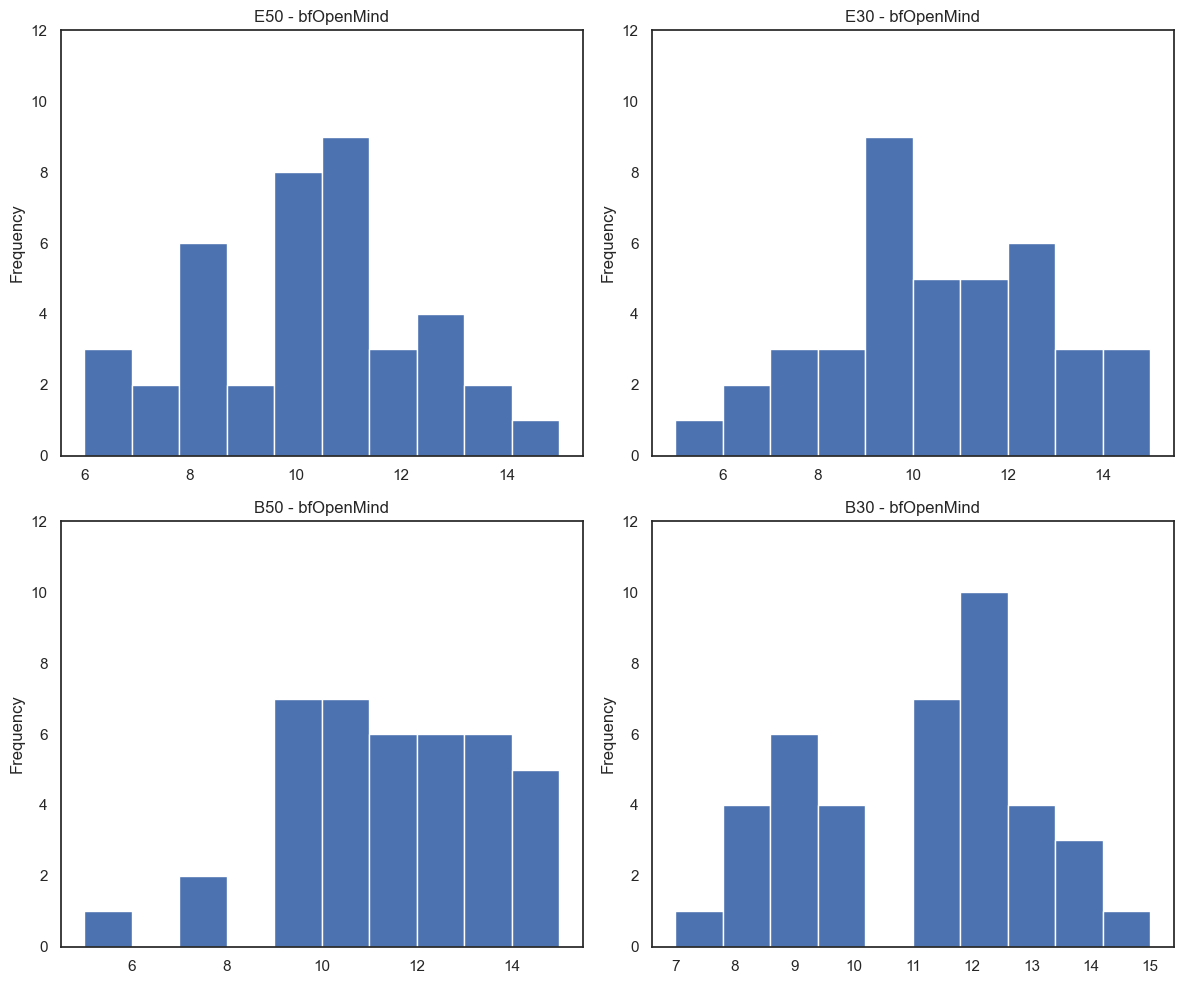

In [133]:
plotVariants(respondents, 'bfOpenMind', 'hist', maxY=12)

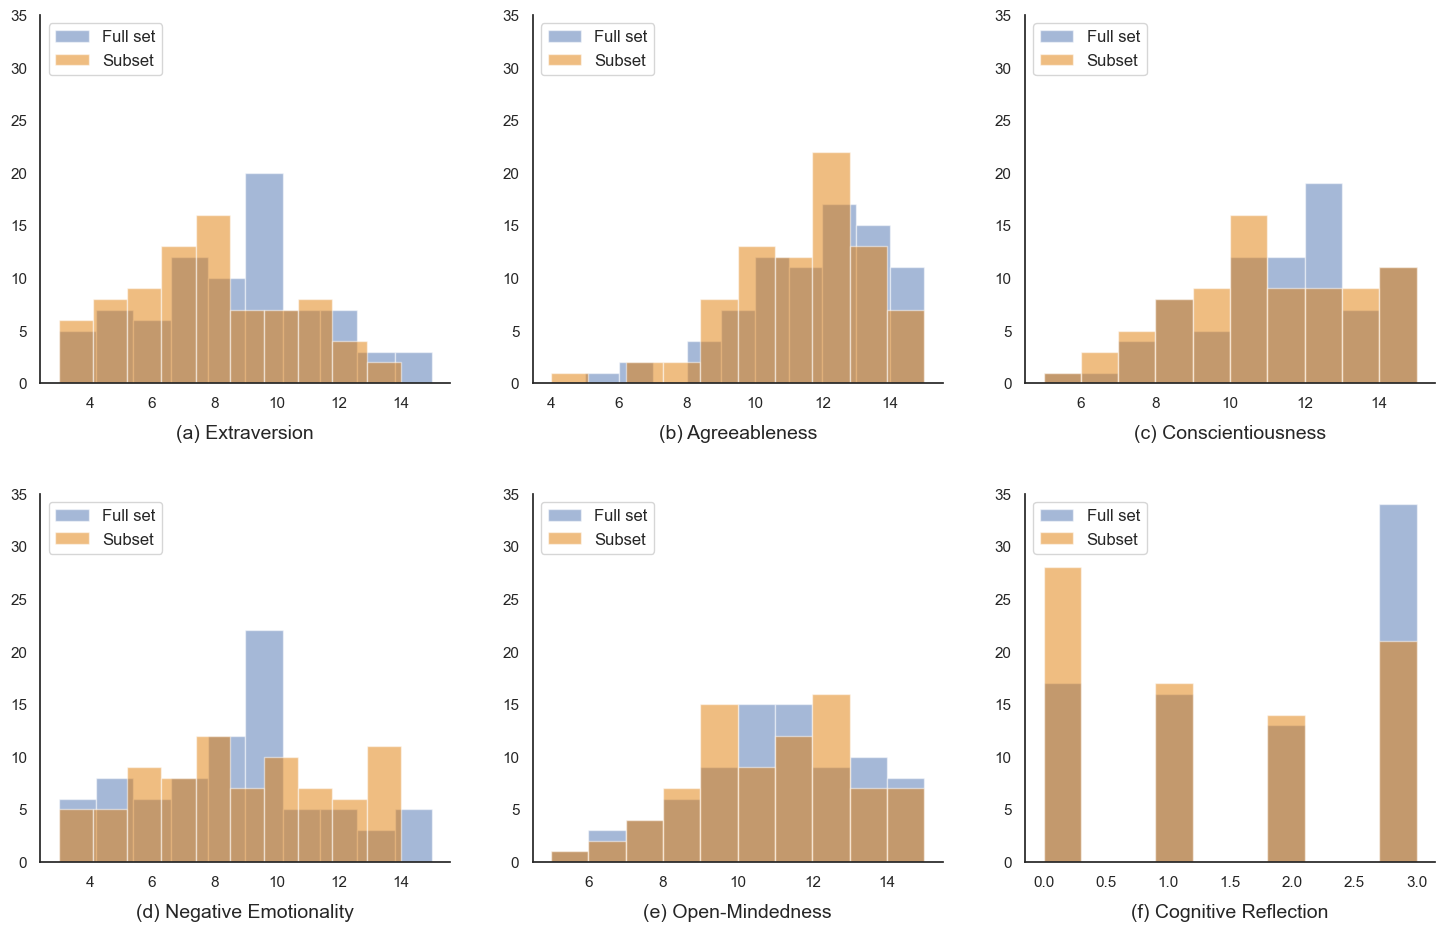

In [134]:
_, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2, figsize=(18, 11))
figs = [ax1, ax2, ax3, ax4, ax5, ax6]
maxY = 35
sns.set_theme(style="white")

traits = {
    "bfExtra": "Extraversion",
    "bfAgree": "Agreeableness",
    "bfConsc": "Conscientiousness",
    "bfNegEmo": "Negative Emotionality",
    "bfOpenMind": "Open-Mindedness",
    "crt": "Cognitive Reflection"
}
labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for i, attr in enumerate(['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'crt']):
    respondents[(respondents.variant=='E50') | (respondents.variant=='B50')][attr].plot.hist(
        ax=figs[i], alpha=0.5, label='Full set', title=traits[attr], color='#4C72B0', bins=10)
    respondents[(respondents.variant=='E30') | (respondents.variant=='B30')][attr].plot.hist(
        ax=figs[i], alpha=0.5, label='Subset', color = '#E17C05', bins=10)
    figs[i].set_ylim(top=maxY)
    figs[i].legend(loc='upper left', fontsize=12)
    figs[i].set_ylabel("")
    figs[i].set_title("")
    figs[i].set_xlabel(f"{labels[i]} {traits[attr]}", fontsize=14, labelpad=10)
    figs[i].spines['top'].set_visible(False)
    figs[i].spines['right'].set_visible(False)
    figs[i].tick_params(axis='both', which='major', labelsize=11)
plt.subplots_adjust(
    hspace=0.3,
    wspace=0.2
)

In [135]:
respondents[(respondents.variant=='E50') | (respondents.variant=='B50')]['bfAgree'].values
    # respondents[(respondents.variant=='E30') | (respondents.variant=='B30')][attr].plot.hist(ax=figs[i], alpha=0.5, label='Subset')

array([13,  9, 12, 14, 12,  9, 14, 12, 10, 13, 12,  5, 11, 12, 10, 12,  6,
       11, 12, 12, 14, 12, 12, 13, 10, 13, 10, 10, 14, 13, 11, 11, 11,  9,
       13,  9,  6,  8,  9, 10,  9, 11, 11, 11,  8, 13, 13, 12, 13, 15, 15,
       13, 10, 11, 13, 12, 15, 10, 10,  8, 12, 14,  8,  9, 15, 10, 12, 10,
       11, 14, 13, 13, 13, 13, 12, 12, 11, 10, 12, 14])

## Feedback

### Feedback scales

In [136]:
respondents[['variant', 'labelClarity', 'sortDifficulty', 'concentration']].groupby('variant').agg(['mean', 'std', 'min', 'max', 'median'])

labelClarity                          sortDifficulty                \
                mean       std min max median           mean       std min   
variant                                                                      
B30            4.275  0.784056   2   5    4.0          3.425  0.873763   2   
B50            4.250  0.742484   3   5    4.0          3.350  0.948683   2   
E30            4.500  0.751068   2   5    5.0          3.850  1.075365   2   
E50            4.625  0.540062   3   5    5.0          3.750  0.776250   1   

                   concentration                           
        max median          mean       std min max median  
variant                                                    
B30       5    4.0         4.200  0.966092   2   5    5.0  
B50       5    3.0         4.300  0.822753   2   5    4.5  
E30       5    4.0         4.600  0.744208   2   5    5.0  
E50       5    4.0         4.575  0.675107   3   5    5.0

In [137]:
respondents[['variant', 'timeAmount', 'cardQuantity']].groupby('variant').agg(['mean', 'std', 'min', 'max', 'median'])

timeAmount                          cardQuantity                    \
              mean       std min max median         mean       std min max   
variant                                                                      
B30          3.075  0.525625   2   4    3.0        2.800  0.563869   2   4   
B50          2.800  0.648470   1   4    3.0        2.325  0.729858   1   3   
E30          2.925  0.615505   2   4    3.0        3.050  0.749359   2   5   
E50          3.025  0.530481   2   5    3.0        3.075  0.615505   2   5   

                
        median  
variant         
B30        3.0  
B50        2.0  
E30        3.0  
E50        3.0

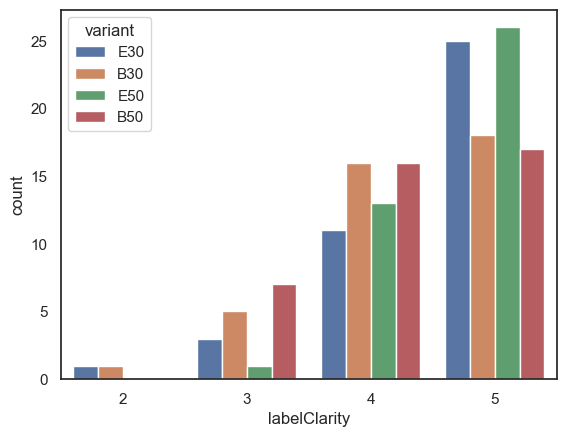

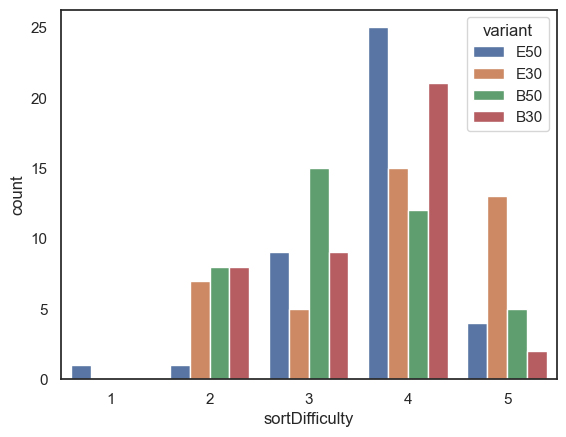

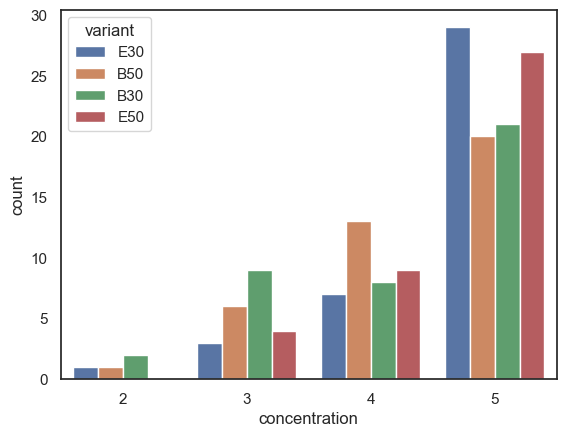

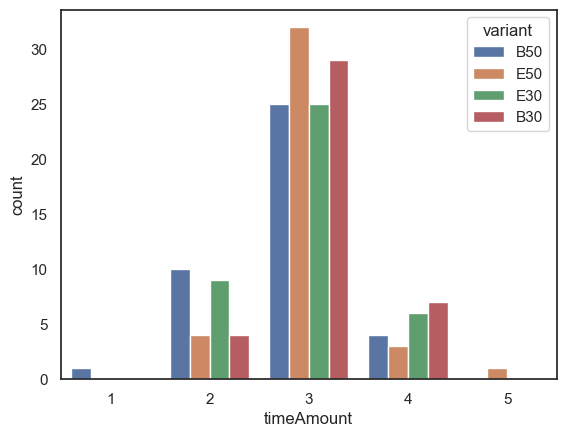

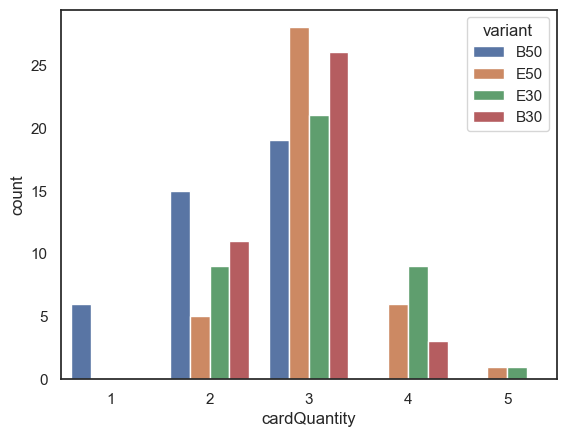

In [138]:
for i in ['labelClarity', 'sortDifficulty', 'concentration', 'timeAmount', 'cardQuantity']:
    sns.countplot(data=respondents, x=i, hue="variant")
    plt.show()

<Axes: xlabel='labelClarity', ylabel='count'>

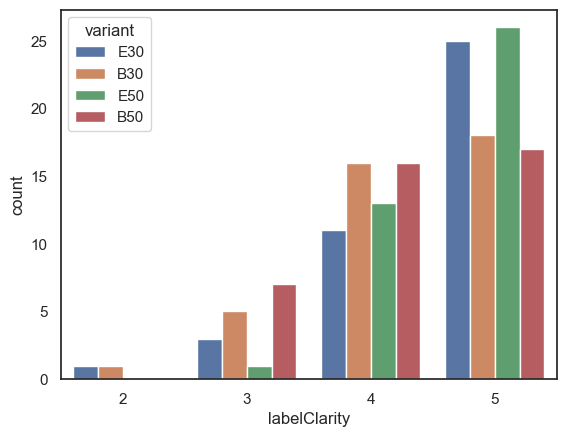

In [139]:
sns.countplot(data=respondents, x="labelClarity", hue="variant")

### Notes

In [140]:
for _, row in respondents.iterrows():
    note = row.note
    if (not pd.isna(note) and note not in ['Did not answer', 'no', 'No', 'na', 'No :)', 
                                           'Not at this time.', 'thanks', 'No.', 'NO', 'No thanks', 'No comments.']):
        print(row.variant, row.respondent, row.note)

E50 6 very good study to understand and questions were easy to follow aswell
E50 12 Good study, please invite me to more.
E50 13 Interesting survey, all went well.
E50 18 This was an interesting task, some of the objects could have straddled more than one category, and some of the categories I chose could have been split down into smaller groupings but I felt that level of granularity would have been unhelpful
E50 34 Thanks for having me. 
E50 37 That was really fun and interesting 
E50 38 the study was clear and easy to use, had fun comming up with own groups rather than ones that are pre labled for you
E50 45 UX / UI is very nice to use and intuitive 
E50 49 There were  some options which I felt would fit in more than one category. For example, graphics cards would fit under both "Computers and accessories" as well as "Gaming". For "Drones", I was not sure whether to put it in its own category, put it under miscellaneous or put it under portable devices. But most of the other items w

## Attention check

In [141]:
respondents.groupby('att1').size()

att1
Other      1
Salad    159
dtype: int64

In [142]:
respondents.groupby('att2').size()

att2
12      6
30    154
dtype: int64